<center><h1 class="background-title">Workshop 5 Background<br>K-NN</h1></center>

## 👨 1-Nearest Neighbors (1-NN)

1-NN is a supervised algorithm solving a classification problem. It is probably the most simple supervised classification algorithm, and it works as follow:

Given a data set $\left\{\boldsymbol{x}_i\right\}$ with corresponding labels $\left\{y_i\right\}$ the algorithm maps any new vector $\tilde{\boldsymbol{x}}$ to the label corresponding to the closest $\boldsymbol{x}_i$:

$$
\hat{i} = \underset{i}{\arg\min}\left\lVert \tilde{\boldsymbol{x}} - \boldsymbol{x}_i\right\lVert_2 \\
\hat{y} = y_\hat{i}
$$

## 👫👬 K-Nearest Neighbors (K-NN)

K-NN is a simple extension of the basic 1-NN, where instead just using the single closest neighbor, we will use the $K$ nearest neighbors. After retrieving the $K$ nearest points we will take the majority vote (the most common label among the $K$ samples) to be our prediction.

<center><h1 class="workshop-title">Workshop 5<br>K-NN</h1></center>

## 🦠 Dataset: Breast Cancer Wisconsin

One of the methods which are used today to diagnose cancer is through a procedure called **Fine-needle aspiration (FNA)**. In this procedure a sample of the tissue in question is extracted using a needle, and is then investigated under a microscope to determine whether the tissue is:

- Malignant - cancerous tissue
- or Benign - non-cancerous tissue

An example of a sample collected using FNA:

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Adenoid_cystic_carcinoma_cytology.jpg/1024px-Adenoid_cystic_carcinoma_cytology.jpg" width="300px" style="width:500px"/></center>

*Image taken from <a href="https://en.wikipedia.org/wiki/Fine-needle_aspiration">Wikipedia</a>*

The **Breast Cancer Wisconsin Diagnostic** is a dataset which was collected by researchers at the University of Wisconsin. It includes 30 numeric properties, such as the average cell area, which were extracted from 569 different samples. The samples are provided along with the labels of whether the sample is malignant or benign.

This dataset is commonly used as an example of a binary classification problem.

The original dataset can be found here: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

The dataset which we will be using in this course can be found [here](https://technion046195.github.io/semester_2019_spring/datasets/breast_cancer.csv)

## ❓️ Problem: Predict the Correct Diagnostic

We would like to help the medical crew make the correct diagnostic by giving them a prediction based on the 30 values which can be extracted from each sample.

**A comment**: Usually in problems such as this we do not intend to replace experienced human making the diagnostic, but merely to give him an extra suggestion.

## 🔃 The Workflow

<center><img src="../media/diagrams/workflow/workflow_intro.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

We will start by loading the data and taking a look at it by printing out the 10 first rows.

In [ ]:
data_file = '../datasets/breast_cancer.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## The Data Fields and Types

For simplicity we will not work with all the data columns and will limit ourselves to the following columns:

- **diagnosis** - The correct diagnosis: M = malignant (cancerous), B = benign (non-cancerous)
- **radius_mean** - The average radius of the cells in the sample.
- **texture_mean** - The average standard deviation of gray-scale values of the cells in the sample.

(A full description for each of the other columns can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names))

###  📉 Some Plots

The number of malignant and benign samples in the dataset

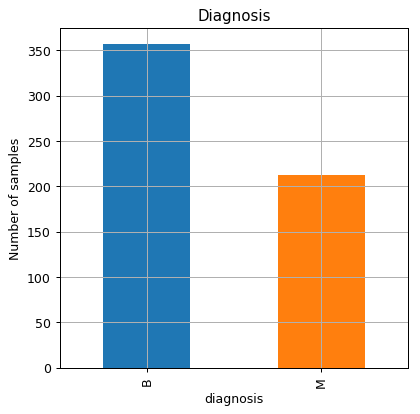

In [ ]:
fig, ax = plt.subplots()
dataset.groupby('diagnosis').size().plot.bar(ax=ax)
ax.set_title('Diagnosis')
ax.set_xlabel('diagnosis')
ax.set_ylabel('Number of samples');

Distribution of samples as a function of the measured values

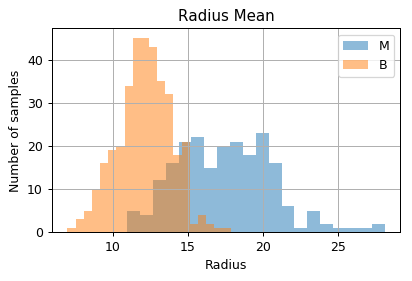

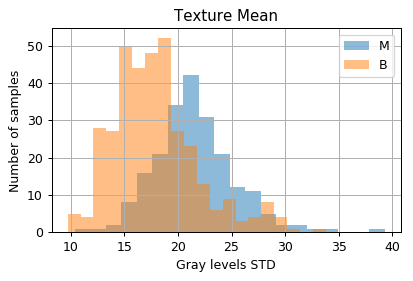

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(dataset.query('diagnosis == "M"')['radius_mean'].values, bins=20, alpha=0.5, label='M')
ax.hist(dataset.query('diagnosis == "B"')['radius_mean'].values, bins=20, alpha=0.5, label='B')
ax.set_title('Radius Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Number of samples');
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(dataset.query('diagnosis == "M"')['texture_mean'].values, bins=20, alpha=0.5, label='M')
ax.hist(dataset.query('diagnosis == "B"')['texture_mean'].values, bins=20, alpha=0.5, label='B')
ax.set_title('Texture Mean')
ax.set_xlabel('Gray levels STD')
ax.set_ylabel('Number of samples');
ax.legend();

And in a 2D plot

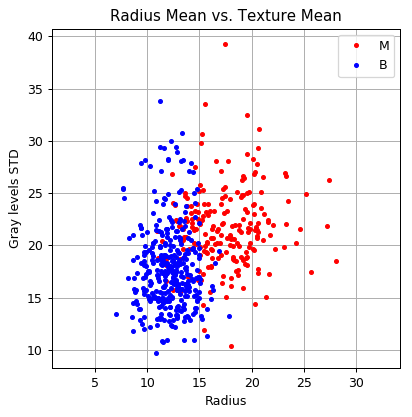

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
ax.axis('equal')

ax.plot(dataset.query('diagnosis == "M"')['radius_mean'].values, 
        dataset.query('diagnosis == "M"')['texture_mean'].values,
        '.r', label='M')
ax.plot(dataset.query('diagnosis == "B"')['radius_mean'].values, 
        dataset.query('diagnosis == "B"')['texture_mean'].values,
        '.b', label='B')
ax.legend()
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');

## 📜 Problem Definition

### The Underlying System

It is usually convenient to describe supervised problems using conditional probability, where the label is generated first from the label's distribution, and then the measured data is generated based upon a distribution conditioned by the label:

<center><img width="500px" src="../media/diagrams/breast_cancer_process.png?"/></center>

### The Task and the Goal

This is a supervised learning problem of binary classification.

We would like to find a prediction function $h\left(\cdot\right)$, mapping form the space of $\boldsymbol{x}=\left[\text{mean_radius},\text{mean_texture}\right]^T$ to the space of labels $y$

### Evaluation Method: The Misclassification Rate

$$
R\left\{h, \left\{\boldsymbol{x},y\right\}\right\}=\frac{1}{N}\sum_i I\left\{h\left(\boldsymbol{x}_i\right)\neq y_i\right\}
$$

### 📚 Splitting the dataset

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed (this is important to make our result reproducible)
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

train_set = dataset.iloc[train_indices]
test_set = dataset.iloc[test_indices]

## 💡 Model & Learning Method Suggestion 1: 1-NN

We will use the 1-NN algorithm to generate our prediction function. The 1-NN has no learning stage

### Voronoi Diagram

Let us plot the prediction function.

We will also add the Voronoi Diagram to it using the [Voronoi](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html) and [voronoi_plot_2d](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.voronoi_plot_2d.html) function from the SciPy package

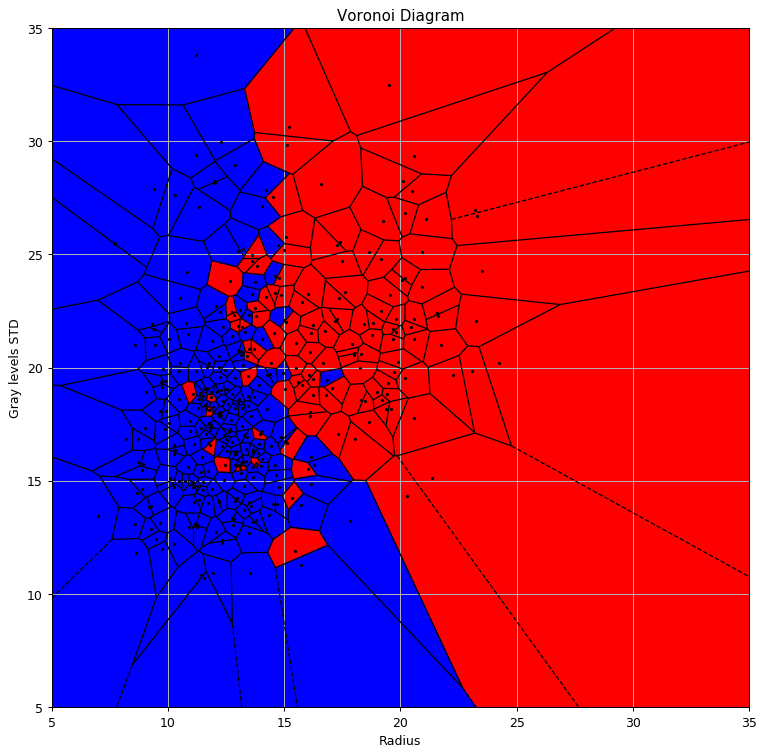

In [ ]:
## Define x & y
x = train_set[['radius_mean', 'texture_mean']].values
y = train_set['diagnosis'].values == 'M'

## Import Voronoi and voronoi_plot_2d
from scipy.spatial import Voronoi, voronoi_plot_2d

## Add some far point to make all cells colsed cell (for ploting only)
x2 = np.concatenate([x, [[0, 1e3], [0, -1e3], [1e3, 0], [1e3, 0]]], axis=0)
y2 = np.concatenate([y, [0, 0, 0, 0]], axis=0)

# generate Voronoi tessellation
vor = Voronoi(x)

# plot Voronoi diagram, and coloer according to labels
fig, ax = plt.subplots(figsize=(10, 10))

voronoi_plot_2d(ax=ax, vor=vor, show_points=False, show_vertices=False, s=1)
ax.set_xlim([5, 35])
ax.set_ylim([5, 35])

vor = Voronoi(x2)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=('r' if y2[r] else 'b'))
plt.plot(x[:, 0], x[:, 1], '.k', markersize=3);
ax.set_title('Voronoi Diagram')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');

### ✍️ Exercise 5.1

Write a function implementing the 1-NN mapping

#### Solution 5.1

In [ ]:
def one_nn(x, stored_x, stored_y):
    distances = ((stored_x - x) ** 2).sum(axis=1)
    nn_index = np.argmin(distances)
    return stored_y[nn_index]

## ⏱️ Performance evaluation

In [ ]:
## Define x & y for the test set
x_test = test_set[['radius_mean', 'texture_mean']].values
y_test = test_set['diagnosis'].values == 'M'

## Initilize the predictions vector
predictions = np.zeros((len(x_test)))
for i in range(len(predictions)):
    predictions[i] = one_nn(x_test[i], x, y)

test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

## 💡 Model & Learning Method Suggestion 1: K-NN

We expect to be able to improve our results using the K-NN algorithm, the question is how can we select $K$? One simple way to do so is to simply test all the relevant values of $K$ and pick the best one.

This is a common case in machine learning, where we have some part of the model which we do not have an efficient way to optimally select. We call these parameters the **hyper-parameters** of the model.

Three more hyper-parameters which we have encountered so far are:

- The number of bins in a histogram.
- The kernel and width in KDE.
- The $K$ in K-Means.

Two optional methods for selecting the hyper-parameters:

#### Brute Force / Grid Search

In some cases, like this one, we will be able to go over all the relevant range of possible values. In this case, we can simply test all of them and pick the values which result in the minimal risk.

#### Trial and error

In many other cases we will simply start by setting the hyper-parameters manually according to some rule of thumb or some smart guess, and iteratively:

1. Solve the model given the fixed hyper-parameters.
2. Update the hyper-parameters according to the results we get.

## The workflow revisited - Hyper-parameters

Let us add the loop/iterations over the hyper-parameters to our workflow

<center><img src="../media/diagrams/workflow/workflow_clustering.png" width="300px" style="width:300px"/></center>

## ⚙️ Learning

### ✍️ Exercise 5.2

Select the optimal $K$ from the range $\left[1,100\right]$. Plot the risk as a function of $K$

Use SciKit-Learn's [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class

#### Solution 5.2

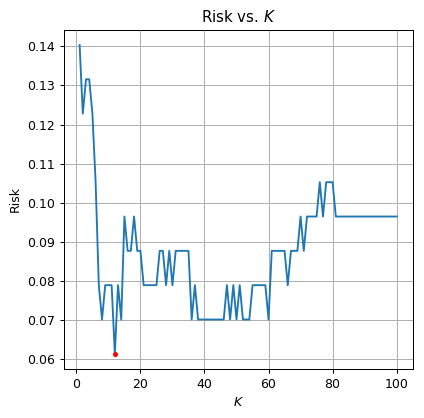

In [ ]:
## import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

k_array = np.arange(1, 101)
risk_array = np.zeros((len(k_array), ))

for i_k in range(len(k_array)):
    knn = KNeighborsClassifier(n_neighbors=k_array[i_k])
    knn.fit(x, y)
    
    predictions = knn.predict(x_test)

    risk_array[i_k] = (y_test != predictions).mean()

optimal_index = np.argmin(risk_array)
optimal_k = k_array[optimal_index]
optimal_risk = risk_array[optimal_index]

print_math('The optimal $K$ is $K={}$'.format(optimal_k))
print_math('The test risk is: ${:.2}$'.format(optimal_risk))

fig, ax = plt.subplots()
ax.plot(k_array, risk_array)
ax.plot(optimal_k, optimal_risk, '.r')
ax.set_xlabel('$K$')
ax.set_ylabel('Risk')
ax.set_title('Risk vs. $K$');

## Train-Validation-Test Separation

In the above example, we have selected the optimal $K$ based upon the risk which was calculated using the test set. As we stated before this situation is problematic since the risk over the test set would be too optimistic due to overfitting.

The solution to this problem is to divide the dataset once more. Therefore in cases, where we would also be required to optimize over some hyper-parameters, we would divide our data into three sets: a train-set a validation-set and a test-set.

A common practice is to use 60% train - 20% validation - 20% test.

### ✍️ Exercise 5.3

Repeat the learning process using the 3-fold split.

#### Solution 5.3

We shall start by splitting the data

In [ ]:
## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_validation = int(n_samples * 0.2)
n_samples_test = n_samples - n_samples_train
train_indices = indices[:n_samples_train]
validation_indices = indices[n_samples_train:(n_samples_train + n_samples_validation)]
test_indices = indices[(n_samples_train + n_samples_validation):]

train_set = dataset.iloc[train_indices]
x = train_set[['radius_mean', 'texture_mean']].values
y = train_set['diagnosis'].values == 'M'

validation_set = dataset.iloc[validation_indices]
x_validation = validation_set[['radius_mean', 'texture_mean']].values
y_validation = validation_set['diagnosis'].values == 'M'

test_set = dataset.iloc[test_indices]
x_test = test_set[['radius_mean', 'texture_mean']].values
y_test = test_set['diagnosis'].values == 'M'

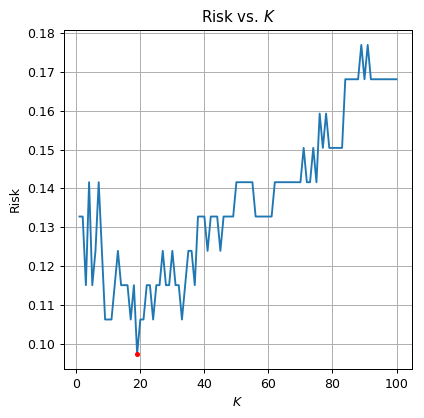

In [ ]:
risk_array = np.zeros((len(k_array), ))

for i_k in range(len(k_array)):
    knn = KNeighborsClassifier(n_neighbors=k_array[i_k])
    knn.fit(x, y)
    
    predictions = knn.predict(x_validation)

    risk_array[i_k] = (y_validation != predictions).mean()

optimal_index = np.argmin(risk_array)
optimal_k = k_array[optimal_index]
optimal_risk = risk_array[optimal_index]

print_math('The optimal $K$ is $K={}$'.format(optimal_k))
print_math('The validation risk is: ${:.2}$'.format(optimal_risk))

fig, ax = plt.subplots()
ax.plot(k_array, risk_array)
ax.plot(optimal_k, optimal_risk, '.r')
ax.set_xlabel('$K$')
ax.set_ylabel('Risk')
ax.set_title('Risk vs. $K$');

## ⏱️ Performance evaluation

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x, y)

predictions = knn.predict(x_test)
test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->